## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

## Loading Data

In [2]:
d = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
# train dataframe
d

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [ ]:
# info about train data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [ ]:
# printing number of unique categories in each feature
print(d.apply(lambda col: len(col.unique())))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64


In [ ]:
# checking for NULL values
d.isnull().values.any()

False

* Total datapoints = 32769
* Zero null/NAN values
* All features are categorical.
* All categories are numerical.
* ROLE_TITLE and ROLE_CODE have same number of categories(343).

Number of requests granted 30872 , ( 94.21099209618848 %)
Number of requests revoked 1897 , ( 5.789007903811529 %)


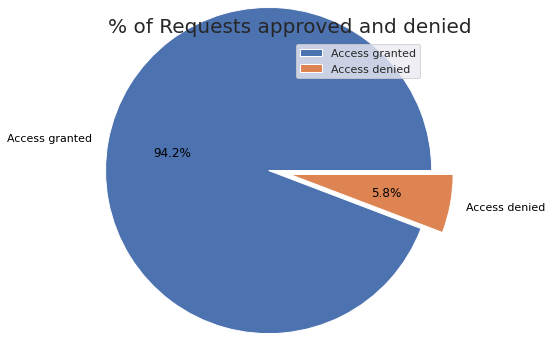

In [ ]:
# distribution of class_labels

labels = 'Access granted', 'Access denied'
y = d['ACTION'].value_counts()
print("Number of requests granted", y[1], ", (", (y[1]/(y[1]+y[0]))*100,"%)")
print("Number of requests revoked", y[0], ", (", (y[0]/(y[1]+y[0]))*100,"%)")

action = [y[1],y[0]]
explode = (0.2, 0)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,5))
plt.pie(action, explode=explode, labels=labels, autopct='%1.1f%%', radius=1.5,textprops=dict(color="black"))
plt.title("% of Requests approved and denied",fontdict={'fontsize':20})
plt.legend()
plt.show()

**Data is highly imbalanced. 94% of total requests gets aprroved.**

In [ ]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='ACTION', col3='total'):
    """
    this function plots stacked bar plots
    """
    ind = np.arange(data.shape[0])
    
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(20,6))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Access Requests')
    plt.title('% of Requests approved')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'approved'))
    plt.show()

In [ ]:
def univariate_barplots(data, col1, col2='ACTION', top=False):

    """
    function for plotting bar plot of col1 w.r.t col2
    """
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']

    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')

    print("="*50)
    print("="*50)
    print("id's with highest number of requests")
    print(temp.head(5))
    print("="*50)
    print("="*50)
    print("id's with lowest number of requests")
    print(temp.tail(5))
    print("="*50)
    print("="*50)
    temp.sort_values(by=['Avg'],inplace=True, ascending=True)
    print("id's with lowest % of approved requests")
    print(temp.head(5))

## Resource

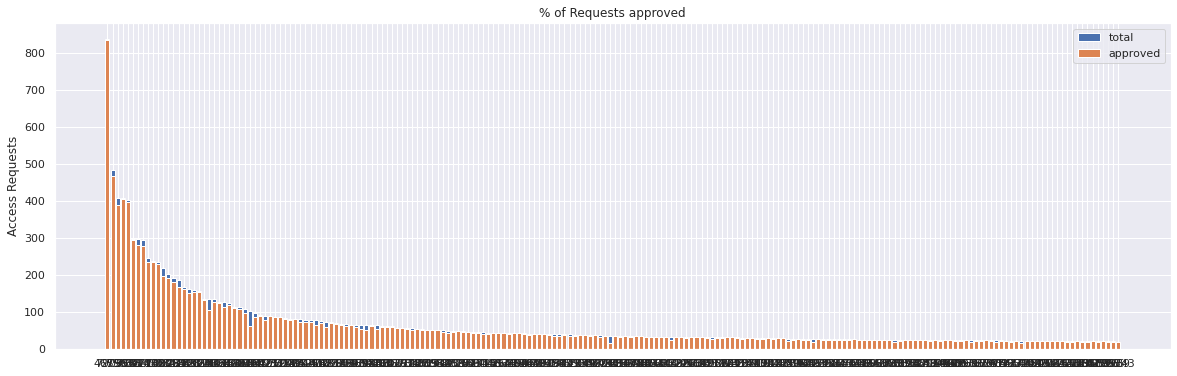

id's with highest number of requests
      RESOURCE  ACTION  total       Avg
194       4675     836    839  0.996424
5566     79092     468    484  0.966942
1329     25993     390    409  0.953545
4936     75078     405    409  0.990220
182       3853     398    404  0.985149
id's with lowest number of requests
      RESOURCE  ACTION  total       Avg
5884     80195      21     22  0.954545
3589     42508      22     22  1.000000
1112     23965      19     22  0.863636
811      19989      21     22  0.954545
5668     79543      20     21  0.952381
id's with lowest % of approved requests
      RESOURCE  ACTION  total       Avg
1465     27416      18     37  0.486486
915      20897      62    104  0.596154
828      20222      24     33  0.727273
3939     43877      21     28  0.750000
5232     77300      19     25  0.760000


In [ ]:
# top 200 resource_id's with most number of requests
univariate_barplots(d,'RESOURCE','ACTION',200)

* **It is quite clear from bar_plots that most of the requests of all resources gets approved**
* **Resource id's 27416 & 20897 have least % of requests approved (48% & 59%). Other id's have very good % of requests getting approved.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


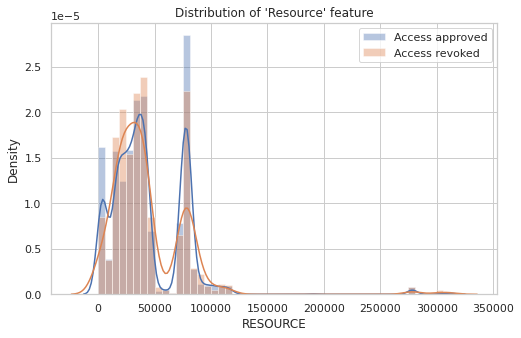

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")

sns.distplot(d['RESOURCE'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['RESOURCE'][d['ACTION']==0] , label = "Access revoked")

plt.title("Distribution of 'Resource' feature")
plt.legend()
plt.show()

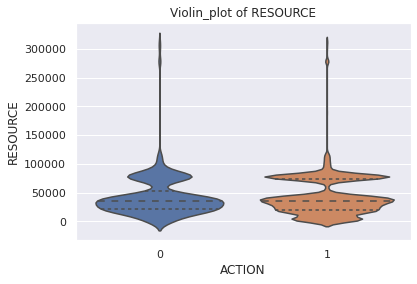

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="RESOURCE", data=d,inner="quartile")
plt.title('Violin_plot of RESOURCE')
plt.show()

* **Nothing much can be used to separate both class_labels from above two plots.**
* **Densities and distribution of both class_labels are very similar.**

## MGR ID

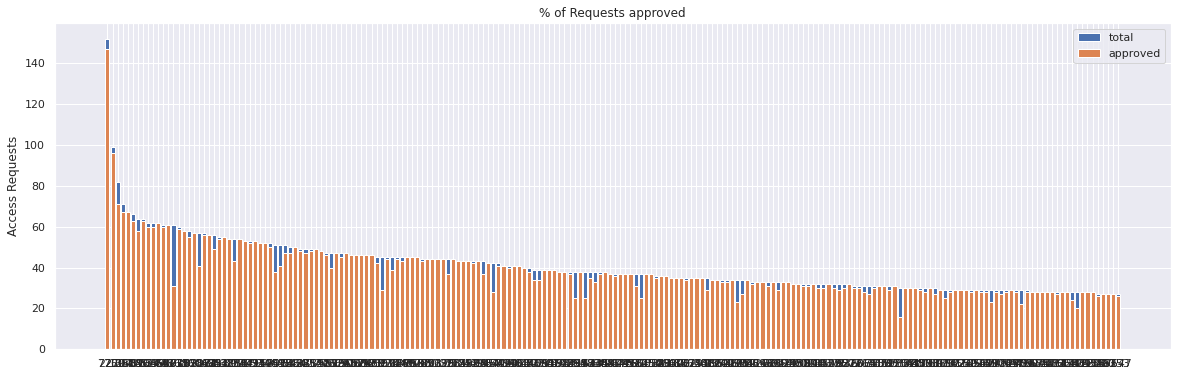

id's with highest number of requests
     MGR_ID  ACTION  total       Avg
62      770     147    152  0.967105
261    2270      96     99  0.969697
311    2594      71     82  0.865854
123    1350      67     71  0.943662
220    2014      67     67  1.000000
id's with lowest number of requests
      MGR_ID  ACTION  total       Avg
2283   23200      26     27  0.962963
843     5262      27     27  1.000000
1728   15967      27     27  1.000000
2848   49353      27     27  1.000000
1154    7547      26     27  0.962963
id's with lowest % of approved requests
      MGR_ID  ACTION  total       Avg
3212   54618      31     61  0.508197
2060   19832      16     30  0.533333
2754   46526      29     45  0.644444
343     2837      25     38  0.657895
2870   49574      25     38  0.657895


In [ ]:
univariate_barplots(d,'MGR_ID','ACTION',200)

* **MGR_id - 770 gets considerably more requests than other ids**
* **Most of the requests are approved, except by few MGR_ids's.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


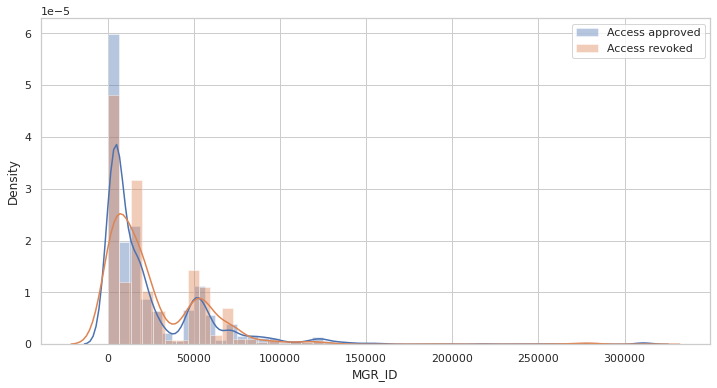

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.distplot(d['MGR_ID'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['MGR_ID'][d['ACTION']==0] , label = "Access revoked")
plt.legend()
plt.show()

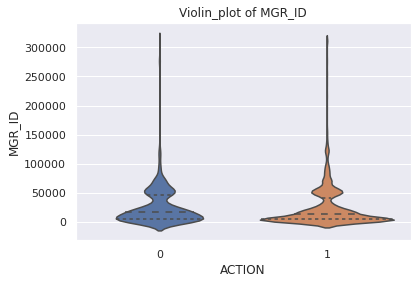

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="MGR_ID", data=d,inner="quartile")
plt.title('Violin_plot of MGR_ID')
plt.show()

* **Density distribution and violin_plot are similar for both class labels in case of MGR_id's**

## Role_Rollup_1

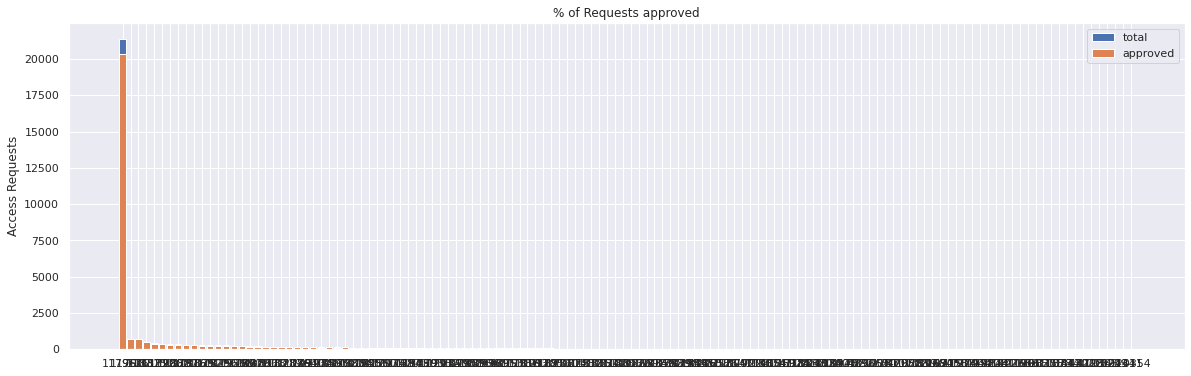

id's with highest number of requests
    ROLE_ROLLUP_1  ACTION  total       Avg
21         117961   20320  21407  0.949222
9          117902     714    742  0.962264
3           91261     695    721  0.963939
54         118315     474    498  0.951807
48         118212     385    400  0.962500
id's with lowest number of requests
     ROLE_ROLLUP_1  ACTION  total  Avg
83          119343       1      1  1.0
123         203209       1      1  1.0
124         209434       1      1  1.0
101         121411       0      1  0.0
96          120354       1      1  1.0
id's with lowest % of approved requests
     ROLE_ROLLUP_1  ACTION  total       Avg
101         121411       0      1  0.000000
51          118256     202    275  0.734545
41          118138      16     21  0.761905
23          117978      48     62  0.774194
92          119920      45     58  0.775862


In [ ]:
univariate_barplots(d,'ROLE_ROLLUP_1','ACTION')

* **21k of total 32k requests are from one id - 117961, and almost 95% of which are approved**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


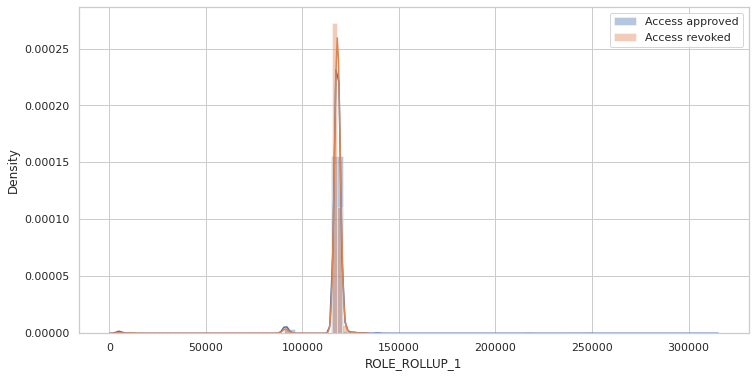

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.distplot(d['ROLE_ROLLUP_1'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['ROLE_ROLLUP_1'][d['ACTION']==0] , label = "Access revoked")
plt.legend()
plt.show()

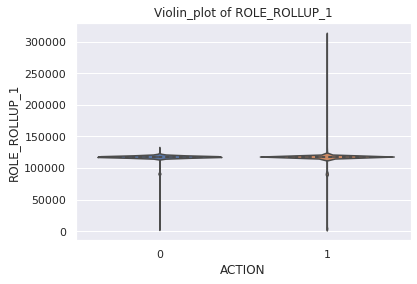

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="ROLE_ROLLUP_1", data=d,inner="quartile")
plt.title('Violin_plot of ROLE_ROLLUP_1')
plt.show()

* **Above plots clearly shows the accumulation of requests at single id.**

## Role_Rollup_2

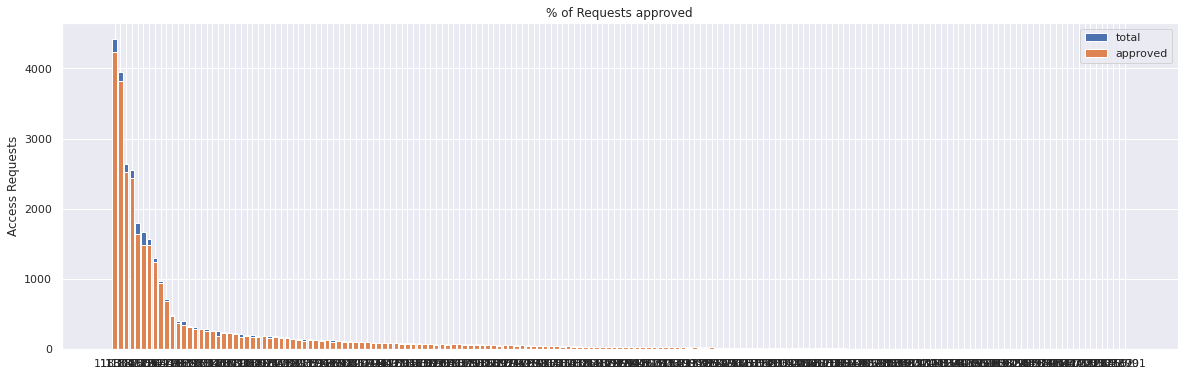

id's with highest number of requests
    ROLE_ROLLUP_2  ACTION  total       Avg
64         118300    4230   4424  0.956148
68         118343    3823   3945  0.969075
66         118327    2521   2641  0.954563
58         118225    2438   2547  0.957205
71         118386    1639   1796  0.912584
id's with lowest number of requests
     ROLE_ROLLUP_2  ACTION  total  Avg
164         132840       1      1  1.0
132         120355       1      1  1.0
142         121602       1      1  1.0
161         131390       1      1  1.0
176         286791       0      1  0.0
id's with lowest % of approved requests
     ROLE_ROLLUP_2  ACTION  total  Avg
176         286791       0      1  0.0
151         125018       0      1  0.0
106         119216       3      6  0.5
124         119836       3      6  0.5
159         130600      14     28  0.5


In [ ]:
univariate_barplots(d,'ROLE_ROLLUP_2','ACTION')

* **Few role_roolup_2 categories account for maximum number of requests. Very less requests are generated from rest of the categories**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


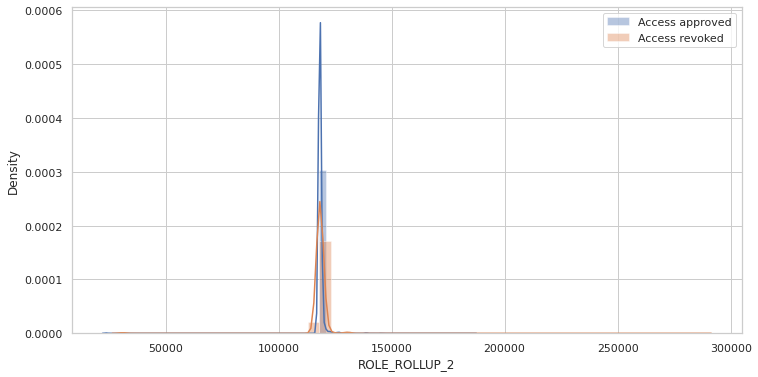

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.distplot(d['ROLE_ROLLUP_2'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['ROLE_ROLLUP_2'][d['ACTION']==0] , label = "Access revoked")
plt.legend()
plt.show()

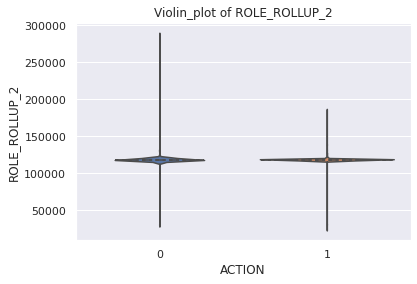

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="ROLE_ROLLUP_2", data=d,inner="quartile")
plt.title('Violin_plot of ROLE_ROLLUP_2')
plt.show()

* **categories with id value around '110000-120000' account for maximum requests.**

## Role_Deptname

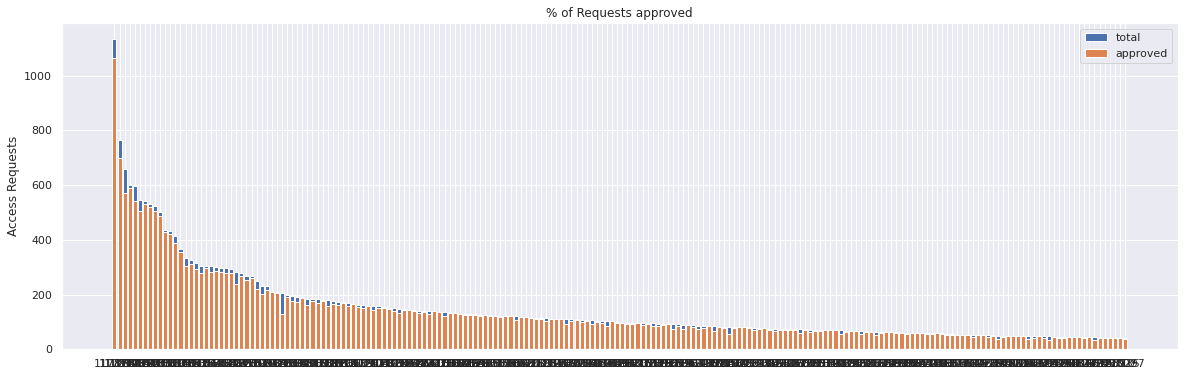

id's with highest number of requests
    ROLE_DEPTNAME  ACTION  total       Avg
13         117878    1064   1135  0.937445
19         117941     700    763  0.917431
20         117945     570    659  0.864947
70         118514     589    601  0.980033
18         117920     541    597  0.906198
id's with lowest number of requests
     ROLE_DEPTNAME  ACTION  total       Avg
422         149210      43     43  1.000000
329         124380      42     43  0.976744
261         121710      43     43  1.000000
378         128935      43     43  1.000000
199         120297      39     42  0.928571
id's with lowest % of approved requests
     ROLE_DEPTNAME  ACTION  total       Avg
128         118992     129    206  0.626214
53          118404      56     83  0.674699
318         123757      33     47  0.702128
322         123901      37     50  0.740000
157         119569      34     45  0.755556


In [ ]:
univariate_barplots(d,'ROLE_DEPTNAME','ACTION',200)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


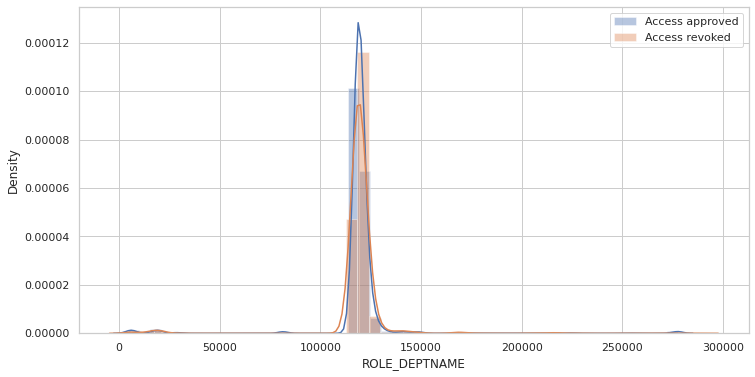

In [ ]:
plt.figure(figsize=(12,6))

sns.set_theme(style="whitegrid")

sns.distplot(d['ROLE_DEPTNAME'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['ROLE_DEPTNAME'][d['ACTION']==0] , label = "Access revoked")

plt.legend()
plt.show()

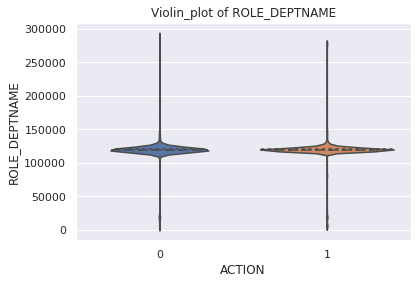

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="ROLE_DEPTNAME", data=d,inner="quartile")
plt.title('Violin_plot of ROLE_DEPTNAME')
plt.show()

* **Role_Deptname categories with value around 120000-140000 accounts for maximum number of requests.**
* **Nothing to differentiate between class_labels in density_plot and violin_plot**

## Role_Title

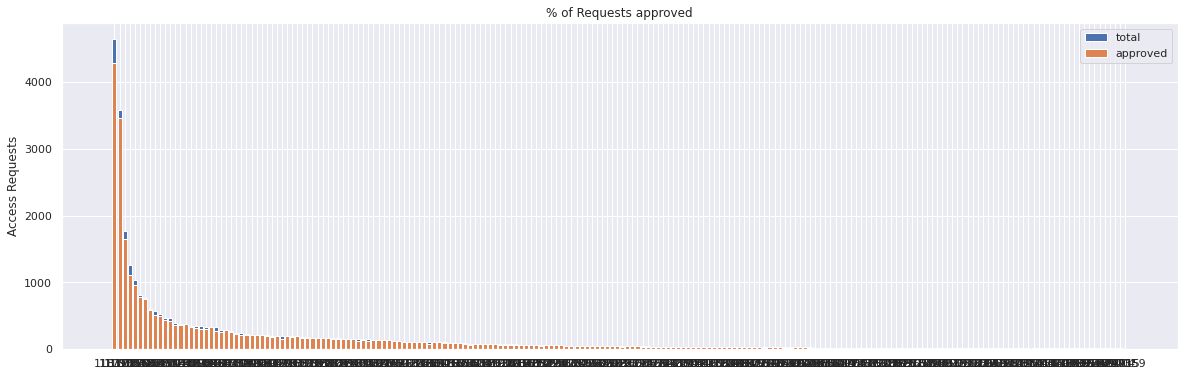

id's with highest number of requests
    ROLE_TITLE  ACTION  total       Avg
22      118321    4279   4649  0.920413
4       117905    3467   3583  0.967625
47      118784    1647   1772  0.929458
0       117879    1117   1256  0.889331
36      118568     965   1043  0.925216
id's with lowest number of requests
     ROLE_TITLE  ACTION  total       Avg
10       118047      12     12  1.000000
25       118370      10     12  0.833333
62       119004      11     12  0.916667
130      121015      12     12  1.000000
339      299559      10     11  0.909091
id's with lowest % of approved requests
     ROLE_TITLE  ACTION  total       Avg
39       118674      13     28  0.464286
76       119502       7     13  0.538462
206      126085      14     21  0.666667
71       119346      20     30  0.666667
7        117985      12     18  0.666667


In [ ]:
univariate_barplots(d,'ROLE_TITLE','ACTION',200)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


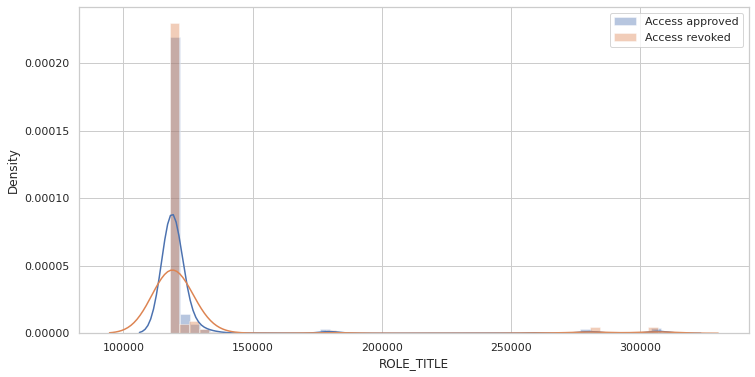

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.distplot(d['ROLE_TITLE'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['ROLE_TITLE'][d['ACTION']==0] , label = "Access revoked")
plt.legend()
plt.show()

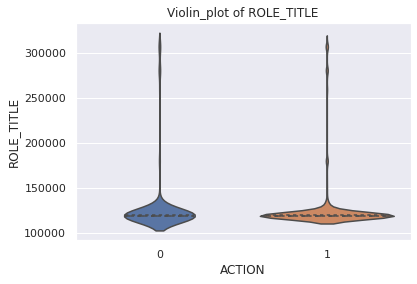

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="ROLE_TITLE", data=d,inner="quartile")
plt.title('Violin_plot of ROLE_TITLE')
plt.show()

* **Unique categories = 343, frequency of requests from most of the categories is very less, only few (around 100000-140000) accounts for maximum number of requests.**

## Role Family Desc

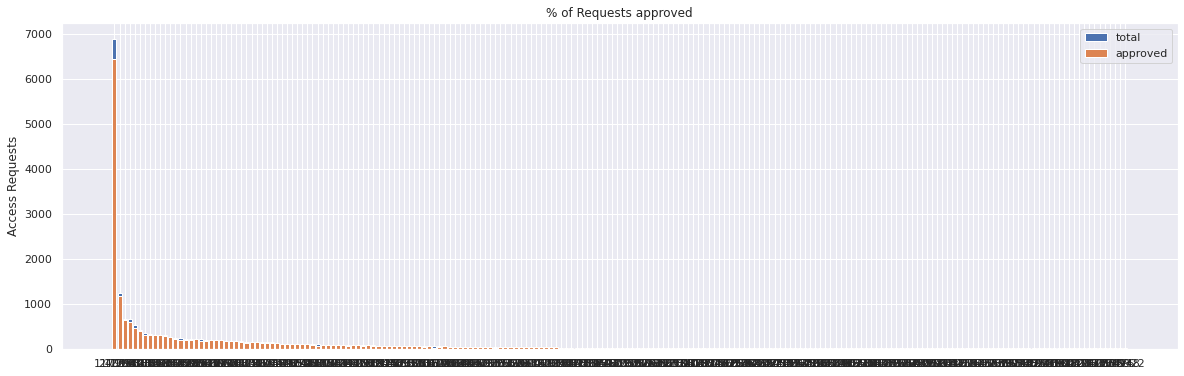

id's with highest number of requests
      ROLE_FAMILY_DESC  ACTION  total       Avg
7               117906    6437   6896  0.933440
1901            240983    1189   1244  0.955788
8               117913     649    670  0.968657
2143            279443     615    665  0.924812
3               117886     478    530  0.901887
id's with lowest number of requests
      ROLE_FAMILY_DESC  ACTION  total  Avg
851             137949      21     21  1.0
407             125889      21     21  1.0
470             127475      21     21  1.0
1236            156948      21     21  1.0
513             128322      18     20  0.9
id's with lowest % of approved requests
      ROLE_FAMILY_DESC  ACTION  total       Avg
374             125047       4     22  0.181818
2172            286106      36     65  0.553846
398             125711      15     26  0.576923
640             131163      16     26  0.615385
716             132803      13     21  0.619048


In [ ]:
univariate_barplots(d,'ROLE_FAMILY_DESC','ACTION',200)

* **categories- 117906 & 240983 has considerably more requests than others**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


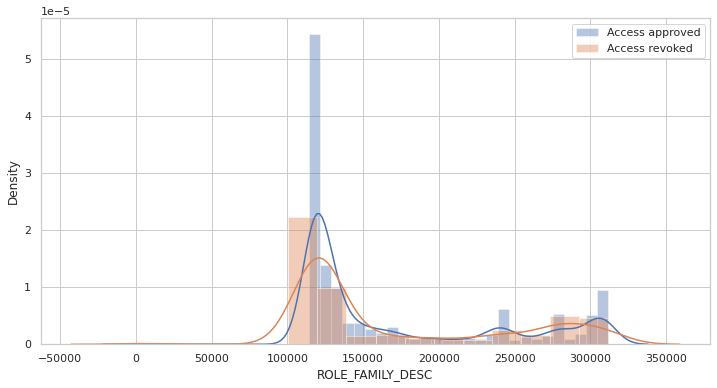

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

sns.distplot(d['ROLE_FAMILY_DESC'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['ROLE_FAMILY_DESC'][d['ACTION']==0] , label = "Access revoked")

plt.legend()
plt.show()

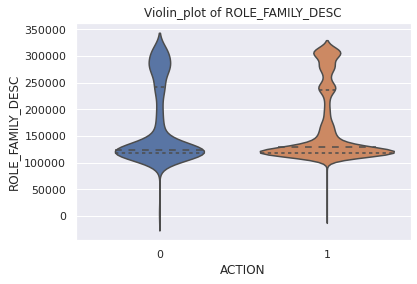

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="ROLE_FAMILY_DESC", data=d,inner="quartile")
plt.title('Violin_plot of ROLE_FAMILY_DESC')
plt.show()

* **Since category 117906 has almost 7k requests, densities of both class_labels is high at that region.**

## Role Family

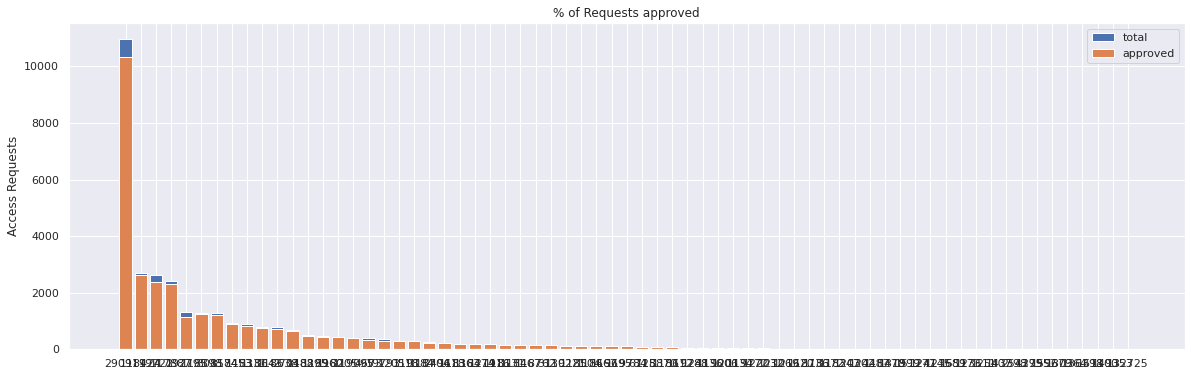

id's with highest number of requests
    ROLE_FAMILY  ACTION  total       Avg
64       290919   10347  10980  0.942350
14       118424    2616   2690  0.972491
3         19721    2393   2636  0.907815
5        117887    2302   2400  0.959167
65       292795    1137   1318  0.862671
id's with lowest number of requests
    ROLE_FAMILY  ACTION  total  Avg
51       130364       3      3  1.0
54       136398       3      3  1.0
60       161100       2      2  1.0
56       149353       2      2  1.0
53       132725       2      2  1.0
id's with lowest % of approved requests
    ROLE_FAMILY  ACTION  total       Avg
49       125407       3      4  0.750000
44       123611       4      5  0.800000
41       121620      19     23  0.826087
4         19793     303    362  0.837017
6        118131     137    160  0.856250


In [ ]:
univariate_barplots(d,'ROLE_FAMILY','ACTION')

* **As seen in other features, here also most of the requests are from few categories only.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


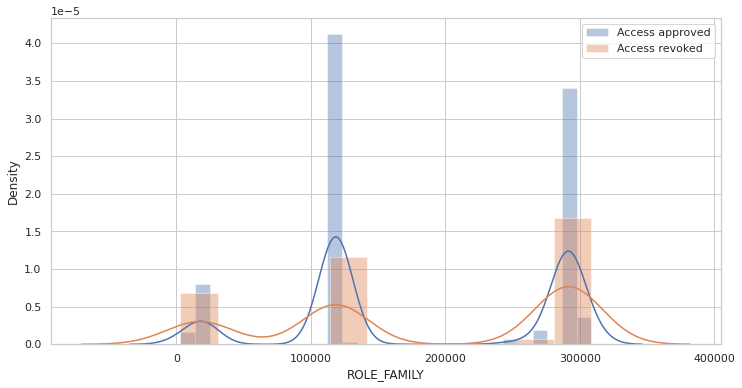

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.distplot(d['ROLE_FAMILY'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['ROLE_FAMILY'][d['ACTION']==0] , label = "Access revoked")
plt.legend()
plt.show()

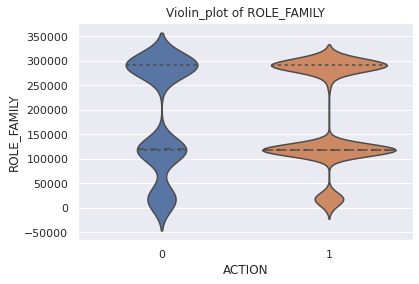

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="ROLE_FAMILY", data=d,inner="quartile")
plt.title('Violin_plot of ROLE_FAMILY')
plt.show()

* **categories-290919, 118424, 19721 & 117887 together accounts for almost 19k requests of total 32k, that's why above plots show high density spikes at those regions**

## Role_Code

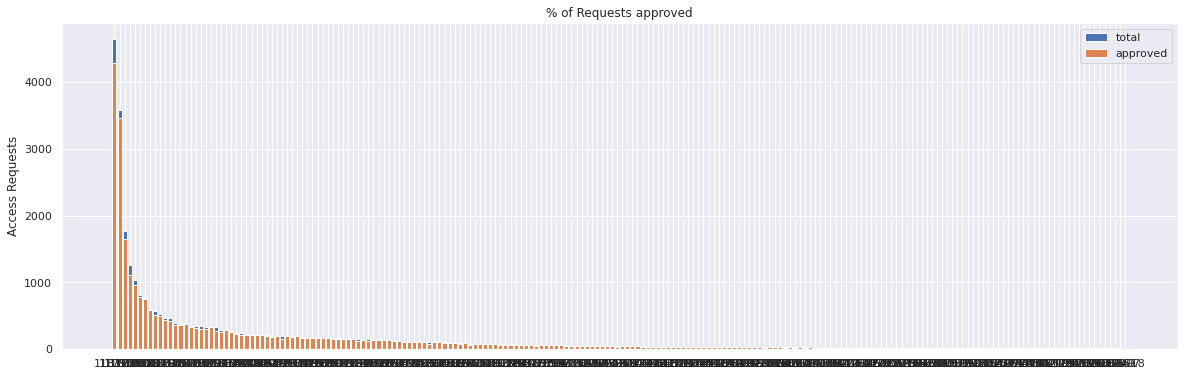

id's with highest number of requests
    ROLE_CODE  ACTION  total       Avg
23     118322    4279   4649  0.920413
4      117908    3467   3583  0.967625
51     118786    1647   1772  0.929458
0      117880    1117   1256  0.889331
40     118570     965   1043  0.925216
id's with lowest number of requests
     ROLE_CODE  ACTION  total       Avg
26      118373      10     12  0.833333
187     123686      12     12  1.000000
10      118049      12     12  1.000000
68      119007      11     12  0.916667
224     126518      11     11  1.000000
id's with lowest % of approved requests
     ROLE_CODE  ACTION  total       Avg
43      118676      13     28  0.464286
83      119503       7     13  0.538462
78      119348      20     30  0.666667
216     126087      14     21  0.666667
7       117987      12     18  0.666667


In [ ]:
univariate_barplots(d,'ROLE_CODE','ACTION',200)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


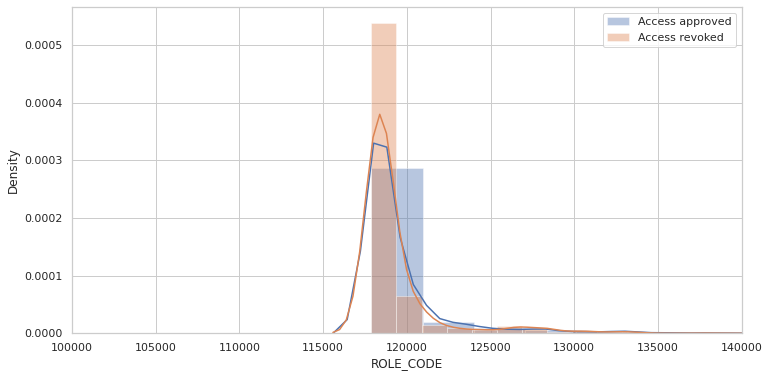

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.distplot(d['ROLE_CODE'][d['ACTION']==1] , label = "Access approved")
sns.distplot(d['ROLE_CODE'][d['ACTION']==0] , label = "Access revoked")
plt.xlim(100000,140000)
plt.legend()
plt.show()

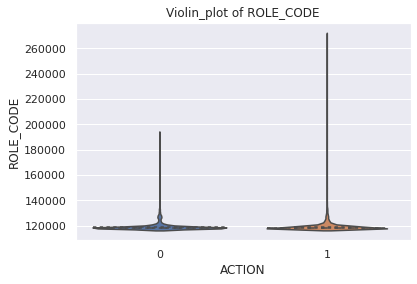

In [ ]:
sns.set_theme(style="darkgrid")
sns.violinplot(x="ACTION", y="ROLE_CODE", data=d,inner="quartile")
plt.title('Violin_plot of ROLE_CODE')
plt.show()

* **Maximum requests came from categories value around 115000-120000.**
* **Plots for Role_code and Role_title are very similar. Both have 343 unique categories. Number of requests for certain categories are also same. I think they might be just different names for same roles.**

# Correlation between features

Since we have categorical features, we will use **'Phi_K Correlation Analyzer Library'** for checking dependency of features with class label.

doc - https://phik.readthedocs.io/en/latest/

* phik_matrix() - Correlation matrix of bivariate gaussian derived from chi2-value.

* It works consistently between categorical, ordinal and interval variables.

* It captures non-linear dependency. It reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution.

* Correlation coefficient value is between 0 and 1.

In [11]:
import phik
from phik import resources, report

In [ ]:
# checking correlation of features with class_label "ACTION"
d.phik_matrix()['ACTION']

interval columns not set, guessing: ['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


ACTION              1.000000
RESOURCE            0.030637
MGR_ID              0.044255
ROLE_ROLLUP_1       0.024685
ROLE_ROLLUP_2       0.043044
ROLE_DEPTNAME       0.031848
ROLE_TITLE          0.020584
ROLE_FAMILY_DESC    0.074811
ROLE_FAMILY         0.109428
ROLE_CODE           0.000000
Name: ACTION, dtype: float64

interval columns not set, guessing: ['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


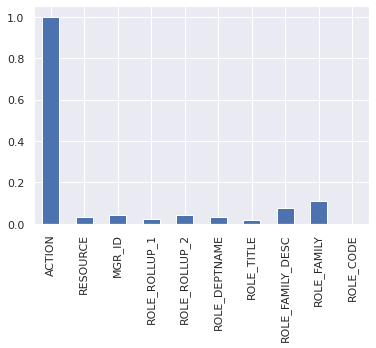

In [ ]:
d.phik_matrix()['ACTION'].plot(kind='bar')

* Value of each feature is quite low. 'ROLE_FAMILY' has highest value(0.1).
* Feature importance can't be determined from this. 

interval columns not set, guessing: ['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


Text(0.5, 1.0, 'Heat Map between all features')

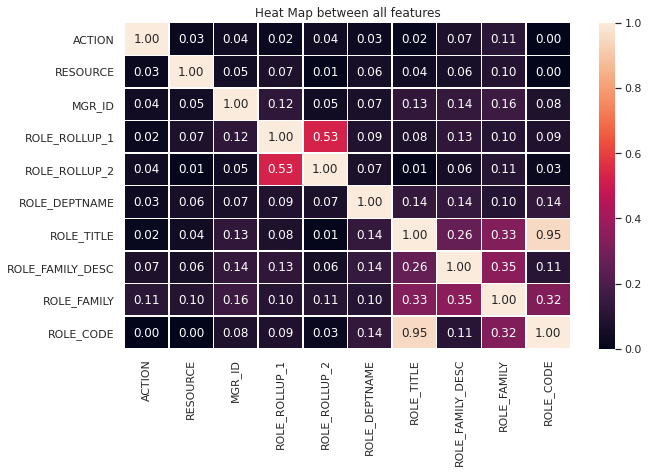

In [12]:
# correlation between features

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6))

sns.heatmap(d.phik_matrix(),annot=True,fmt='0.2f',linewidths=.5)
plt.title('Heat Map between all features')

* ROLE_CODE & ROLE_TITLE are highly correlated(0.95).

* ROLE_ROLLUP_1 & ROLE_ROLLUP_2 have score of 0.53, which shows there is some correlation between them.

# Conclusion
* There are zero NAN/null values in the dataset.

* ROLE_TITLE and ROLE_CODE might be the unique tite and its corresponding unique code of the same role,since they are highly correlated and has same number of categories(343). So we can drop any one of two features.

* There is no correlation between other features.

* Almost 70% of total requests come from ROLE_ROLLUP_2 category-117961.

* Data is highly imbalanced(94:6).

* Though every feature in this dataset has high cardinality, but only few categories accounts for most number of requests.